# 분류(Classification) 심화 실습

## **1. Supervised Learning (지도 학습)**

Supervised Learning(지도 학습)은 머신러닝의 가장 기본적이고 널리 쓰이는 학습 방법이다.

### **[ 구동 방식 ]**

    - 입력 데이터(Features)와 그에 대응하는 정답(Label, Target)이 쌍으로 주어진다.  
    - 정답이 달린 데이터(=라벨링된 데이터)를 바탕으로, 입력과 출력 사이의 규칙과 패턴을 학습한다.

> **즉, 지도 학습은 "정답이 있는 문제지"를 풀면서 기계가 스스로 문제 풀이 공식을 찾아내는 과정이다.**

### [ Supervised Learning의 구조 ]

1. **데이터 수집**: 입력(X)과 정답(y)이 모두 포함된 데이터셋 준비
2. **데이터 전처리**: 결측치 처리, 정규화 등 데이터 품질 개선
3. **모델 선택**: 분류(Classification) 또는 회귀(Regression) 등 문제 유형에 맞는 알고리즘 선택
4. **학습(Training)**: 입력-정답 쌍을 이용해 모델이 패턴을 학습
5. **평가(Evaluation)**: 학습하지 않은 데이터(테스트셋)로 모델의 예측 성능 검증
6. **예측(Prediction)**: 새로운 데이터에 대해 학습된 모델로 정답을 예측


---



### [ Supervised Learning의 유형 ]

- **분류(Classification)**  
  입력 데이터를 여러 개의 범주(클래스) 중 하나로 분류  
  EX) 스팸 메일 분류, 질병 진단, 이미지 속 객체 분류

- **회귀(Regression)**  
  입력 데이터를 연속적인 숫자 값으로 예측  
  EX) 집값 예측, 주식 가격 예측, 온도 예측


### [ Supervised Learning의 주요 알고리즘 ]


| 알고리즘                                   | Classification(분류) | Regression(회귀)    | 비고                                                   |
|:-------------------------------------------|:--------------------:|:-------------------:|:------------------------------------------------------|
| **k-최근접 이웃 (k-NN)**                   |        O             |         O           | KNeighborsClassifier, KNeighborsRegressor 등           |
| **결정 트리 (Decision Tree)**              |        O             |         O           | DecisionTreeClassifier, DecisionTreeRegressor 등       |
| **랜덤 포레스트 (Random Forest)**          |        O             |         O           | RandomForestClassifier, RandomForestRegressor 등       |
| **로지스틱 회귀 (Logistic Regression)**    |        O             |                     | 분류 전용 (이진/다중 클래스)                           |
| **서포트 벡터 머신 (SVM)**                 |        O             |         O           | SVC(분류), SVR(회귀)                                   |
| **신경망 (Neural Network)**                |        O             |         O           | 분류, 회귀 모두 가능                                   |
| **그래디언트 부스팅, XGBoost 등**          |        O             |         O           | GradientBoostingClassifier/Regressor, XGBClassifier 등 |


### [ Supervised Learning의 장단점 ]

**장점**
- 높은 예측 정확도
- 결과 해석이 쉬운 모델(예: 결정 트리)
- 다양한 실생활 문제에 적용 가능

**단점**
- 많은 양의 라벨링된 데이터가 필요
- 새로운 유형의 데이터(정답이 없는 경우)에는 적용 불가
- 과적합(Overfitting) 등 일반화 문제 발생 가능

# **Supervised Learning**

In [2]:
import warnings # 시각화 혹은 모델 실행시 나오는 경고 무시
warnings.filterwarnings('ignore')  


In [3]:
from sklearn.datasets import load_breast_cancer #유방암 데이터

# as_frame=True 옵션을 주면 DataFrame으로 반환 
data = load_breast_cancer(as_frame=True)  
df = data.frame

# 전체 데이터 shape와 컬럼 정보
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
cancer = load_breast_cancer()
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
# 필요한 라이브러리
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 로드
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# X, y의 요약값 확인
print(np.nanmean(X, axis = 0)) # X 평균
print(np.isnan(X).sum(axis = 0)) # X 결측치 개수
print(np.bincount(y)) # y 클래스별 개수
# breast cancer 데이터셋의 X는 (569, 30) 크기의 2차원 배열이라 30개씩 나옴.

[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[212 357]


In [4]:
# 2. 결측치 생성 (실제 데이터에는 없지만 실습 일관성 위해 추가, 실제로는 생략 가능)
np.random.seed(42)
X[np.random.randint(0, X.shape[0], 20), np.random.randint(0, X.shape[1], 20)] = np.nan

## **[1]. 데이터 분할 (6:2:2 비율)**

- X_train, y_train: 모델 학습용  : **실제로 모델을 학습(훈련)시키는 데이터 (60%)**

- X_val, y_val: 모델 튜닝 및 중간 성능 검증용 : **모델의 하이퍼파라미터 튜닝 or 성능 검증에 사용하는 검증 세트 (20%)**

- X_test, y_test: 최종 성능 평가용 (실전 테스트용)  : **모델의 최종 성능을 평가할 때만 사용하는 테스트 세트 (20%)**

In [5]:
# 3. 데이터 분할
# 1차 분할: 전체 데이터에서 20%를 테스트 세트로 분리
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42) # random_state를 빼면 실험마다 값이 다르게 출력됨.

# 2차 분할: 남은 80%에서 25%를 검증 세트로 분리 (0.8 * 0.25 = 0.2)
X_train, X_val, y_train, y_val = train_test_split( 
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42) # 그래서 맞춰서 작성해줘야 함.

In [6]:
# 4. 결측치 처리
imputer = SimpleImputer(strategy = 'mean')  # 평균값으로 결측치 채울것이다
X_train = imputer.fit_transform(X_train)  # 학습 데이터의 결측치를 평균값으로 채우기
X_val = imputer.transform(X_val)          # 
X_test = imputer.transform(X_test)        # 모두 같은 방법으로 결측치 채우기

In [7]:
# 데이터 요약 확인
pd.DataFrame(X_train, columns = cancer.feature_names).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,14.029579,19.183754,91.409179,646.441935,0.096563,0.106437,0.092774,0.049489,0.181108,0.063246,...,16.160465,25.499531,106.713754,870.835777,0.132554,0.261465,0.284843,0.115324,0.291730,0.084622
std,3.550743,4.528923,24.538890,352.949179,0.013524,0.054265,0.083839,0.039768,0.028106,0.007367,...,4.894327,6.504884,34.222644,574.143700,0.022703,0.166196,0.222781,0.068085,0.065173,0.018729
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.050240,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.160300,0.055250
25%,11.600000,15.860000,74.340000,412.600000,0.086750,0.066010,0.027830,0.019690,0.162000,0.058590,...,12.970000,20.790000,83.670000,509.600000,0.115700,0.148200,0.106700,0.062270,0.252300,0.072420
50%,13.170000,18.750000,85.840000,536.900000,0.096760,0.095090,0.061950,0.032640,0.178400,0.061770,...,14.850000,25.090000,97.650000,680.600000,0.131600,0.215600,0.243700,0.097440,0.283300,0.080190
75%,15.490000,21.680000,102.400000,744.900000,0.105400,0.132800,0.142500,0.077620,0.195300,0.066690,...,17.980000,29.410000,122.400000,985.500000,0.146000,0.342000,0.397700,0.165400,0.319800,0.092180
max,28.110000,39.280000,188.500000,2499.000000,0.142500,0.345400,0.426400,0.191300,0.304000,0.097440,...,33.130000,49.540000,229.300000,3432.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500


##  **[2]. k-최근접 이웃(k-NN)**

- **유사도 기반 분류**: 새로운 데이터 포인트 주변에서 가장 가까운 k개의 훈련 샘플을 찾아 다수결 투표로 클래스 결정
- **지연 학습(Lazy Learning)**: 명시적인 모델 학습 과정 없이 모든 훈련 데이터를 저장 후 예측 시 계산 수행

### - 핵심 하이퍼파라미터
- **k 값 선택**:
  - 작은 k: 지역 패턴 민감(과적합 가능성 ↑)
  - 큰 k: 전역 패턴 반영(과소적합 가능성 ↑)
  - 최적값 탐색을 위해 교차 검증 필수

- **거리 계산 방식**:
  - 유클리드 거리(기본값): `√(Σ(x_i - y_i)^2)`
  - 맨해튼 거리: `Σ|x_i - y_i|`
  - 민코우스키 거리: 일반화된 거리 척도

### - 고급 기법
- **가중 투표**: 
  - 거리 기반 가중치 부여(가까운 이웃에 더 큰 영향력)
  - `weights='distance'` 옵션으로 구현
  - 수식: `가중치 = 1 / (거리 + ε)`

- **최적 k 탐색 전략**:
  - 교차 검증을 통한 성능 평가
  - 엘보우 방법: 검증 오차가 최소화되는 지점 선택
  - 그리드 서치: 지정된 범위 내 최적값 자동 탐색

In [8]:
# 5. 최적 k 값 탐색 (교차 검증)
k_range = range(1, 31) # 탐색할 k 범위 (1~30)
k_scores = []

for k in k_range:
    # KNN Classification 설정
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',   # 거리 역수 가중치 적용 (가까운 이웃이 더 큰 영향력)
        metric='euclidean' )    # 유클리드 거리 계산 방식 사용
    

    # 5-fold 교차 검증 수행 (데이터를 5개 세트로 나누어 4개로 학습 후 1개로 검증)
    scores = cross_val_score(knn, X_train, y_train, cv=5)

     # 각 k값의 평균 검증 정확도 저장
    k_scores.append(scores.mean())

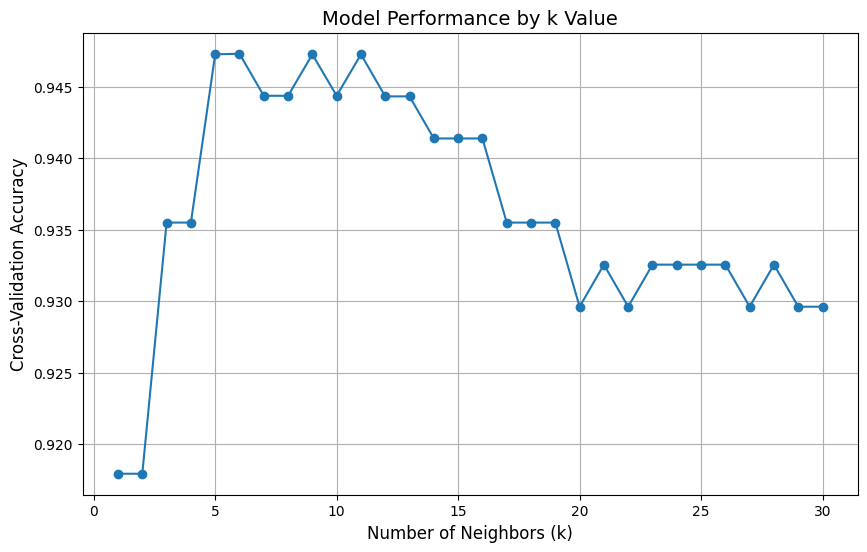

In [9]:
# 6. 시각화를 통해 최적 k 값 확인
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('Model Performance by k Value', fontsize=14)
plt.grid(True)
plt.show()

In [10]:
# 7. 데이터 표준화 (스케일링) == 각 특성을 평균 0, 표준편차 1로 맞추는 객체 생성하기
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터 기준으로 표준화(스케일링)
X_val_scaled = scaler.transform(X_val)          # 같은 기준으로 검증 데이터 변환
X_test_scaled = scaler.transform(X_test)        # 같은 기준으로 테스트 데이터 변환
# 학습 데이터에 모든 데이터를 맞춰줘야 함

In [11]:
# 8. 표준화된 데이터로 k-NN 모델 생성 (가장 성능 좋은 k 사용)
best_k = k_range[np.argmax(k_scores)]
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='euclidean')
knn.fit(X_train_scaled, y_train)

knn

KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')

In [12]:
# 9. 검증/테스트 정확도 확인
print(f"Best k: {best_k}") # 모델 성능이 가장 우수한 이웃 수
print("Validation Accuracy:", knn.score(X_val_scaled, y_val))
print("Test Accuracy:", knn.score(X_test_scaled, y_test))

Best k: 6
Validation Accuracy: 0.956140350877193
Test Accuracy: 0.9824561403508771


## **[3]. 결정 트리(Decision Tree) 기법**

- 데이터를 여러 단계의 질문(조건)으로 나누어가며 분류하는 알고리즘
- 각 분기점(node)에서는 하나의 feature와 임계값(threshold)을 기준으로 데이터를 나누고,  
  마지막 leaf 노드에 도달하면 분류 결과가 정해짐
- 사람이 이해하기 쉬운 IF-THEN 규칙의 집합으로 표현할 수 있어, 해석이 쉽고 시각화가 가능함.
- overfitting을 막기 위해 트리의 깊이 제한, 최소 샘플 수 제한, 가지치기(pruning) 등의 기법을 함께 사용함.


In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# 엔트로피 기준 결정 트리 생성
dt_entropy = DecisionTreeClassifier(
    criterion = 'entropy',      # 분할 기준: 엔트로피 (정보 이득 최대화)
    max_depth = 3,              # 트리 최대 깊이 제한 (과적합 방지)
    min_samples_leaf = 5,       # 리프 노드 최소 샘플 수 (소규모 노드 생성 방지)
    random_state = 42           # 재현성 보장
)
dt_entropy.fit(X_train, y_train)

In [18]:
# 비용-복잡도 가지치기 수행
path = dt_entropy.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # 가지치기 강도 후보값 추출

# 최적 가지치기 강도(alpha) 선택
# 트리 복잡도와 오분류율을 alpha로 조절함
val_scores = []
for alpha in ccp_alphas:
    dt_pruned = DecisionTreeClassifier(
        ccp_alpha = alpha,      # 가지치기 강도 적용
        criterion = 'entropy',
        random_state = 42
    )
    dt_pruned.fit(X_train, y_train)
    val_scores.append(dt_pruned.score(X_val, y_val))  # 검증 세트 성능 평가

best_alpha = ccp_alphas[np.argmax(val_scores)]  # 최고 성능의 alpha 선택

In [14]:
# 최종 모델 생성
dt_final = DecisionTreeClassifier(
    ccp_alpha = best_alpha,     # 최적 가지치기 강도 적용
    criterion = 'entropy',
    random_state = 42
)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       random_state=42)

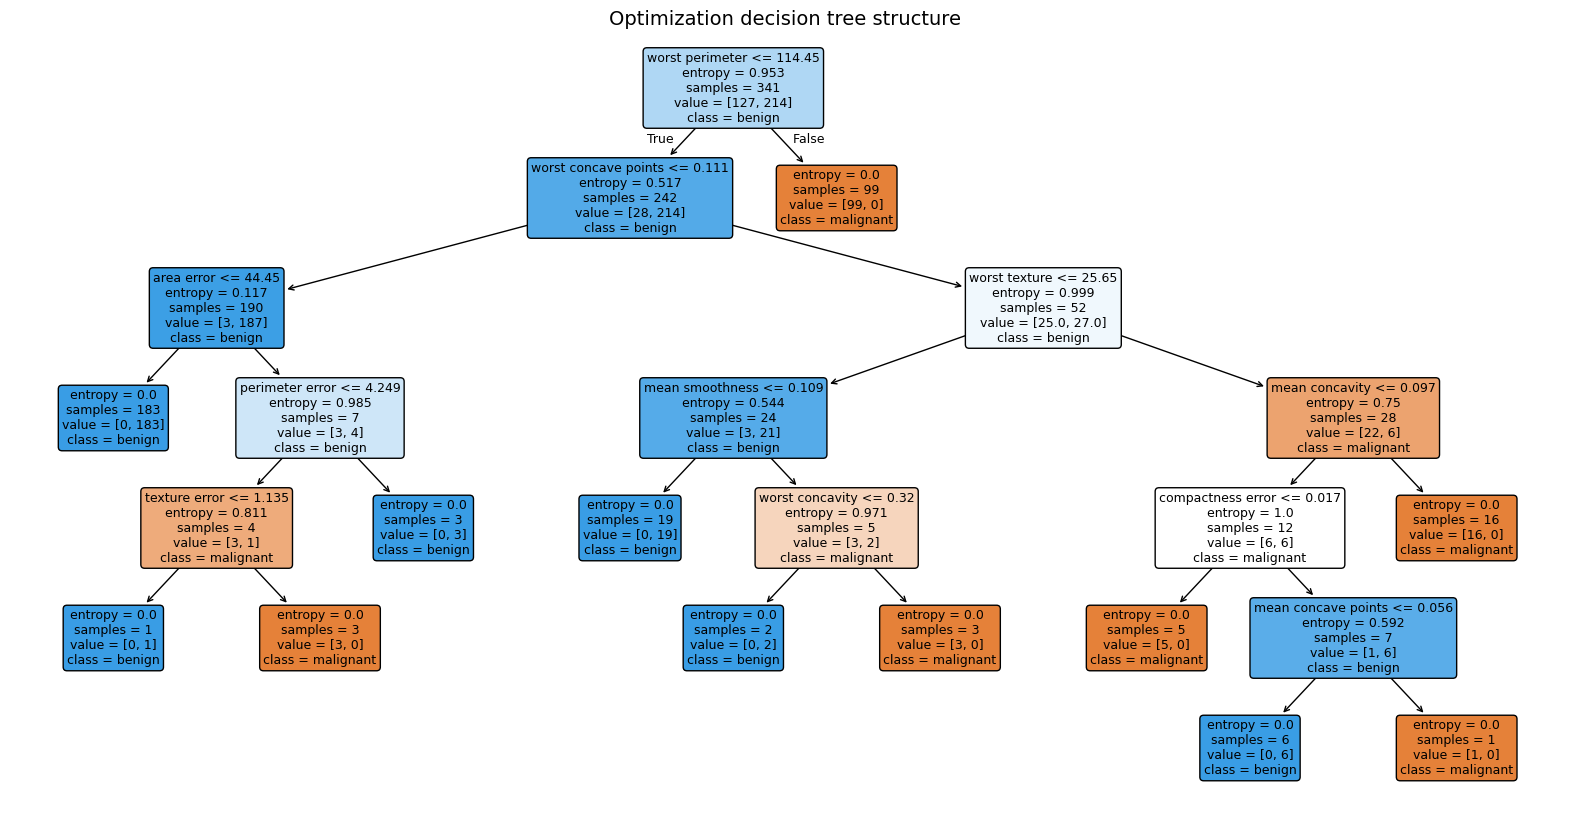

 깊이: 6, 검증 정확도: 0.939


In [15]:
# 트리 구조 시각화
plt.figure(figsize = (20,10))
plot_tree(
    dt_final,
    feature_names = cancer.feature_names,  # 특성 이름 표시
    class_names = cancer.target_names,     # 클래스 이름 표시
    filled = True,                       # 클래스 비율 색상 표시
    rounded = True                       # 노드 모양 둥글게
)
plt.title('Optimization decision tree structure', fontsize = 14)
plt.show()

# 트리 정보
print(f" 깊이: {dt_final.get_depth()}, 검증 정확도: {dt_final.score(X_val, y_val):.3f}")

### **[ Decision Tree 해석 ]**

- 가지치기를 적용한 깊이 6의 결정 트리가, 학습에 사용하지 않은 검증 세트에서 93.9%의 정확도를 보임.

**최종 트리 깊이**: 6

    - 입력 특성(30개) 중 중요한 변수들을 기준으로, 최대 6단계 분기(질문)를 거쳐 예측을 수행했음

**검증 정확도**: 0.939

    - 학습에 사용하지 않은 검증 세트에서 93.9%의 샘플을 올바르게 분류함.
    - 모델이 새로운 데이터에 대해서도 높은 예측 성능을 보임

## **[4]. Ensemble Learning**

- **앙상블 학습**은 여러 개의 머신러닝 모델(개별 모델, base learner, weak learner 등)을 결합해,
  
  하나의 모델보다 더 높은 예측 성능과 안정성을 얻는 방법.
- 서로 다른 모델들이 가진 약점은 서로 보완하고, 강점은 합쳐져서 더 강력하고 견고한 예측 결과를 만드는 것.
- 단일 모델보다 앙상블이 더 좋은 효과를 내는 경우가 더 많음

### 왜 앙상블 학습을 쓸까?
- **오버피팅(과적합) 감소**: 여러 모델의 예측을 평균내거나 투표하면, 한 모델이 데이터에 너무 치우친 결과를 보정할 수 있음.
- **일반화 성능 향상**: 다양한 모델의 예측을 합치면, 새로운 데이터에 대해서도 더 안정적인 성능을 기대할 수 있음.
- **모델의 약점 보완**: 서로 다른 구조나 알고리즘의 모델을 조합하면, 한 모델이 잘 못 맞추는 부분을 다른 모델이 보완할 수 있음.

### 대표적인 앙상블 방법
- **Bagging (배깅)**  
  여러 모델을 독립적으로 학습시켜, 예측을 **평균(회귀)** 또는 **다수결(분류)** 로 결정한다.  
  ex) Random Forest

- **Boosting (부스팅)**  
  여러 모델을 순차적으로 학습시키며, 앞선 모델이 틀린 부분에 가중치를 두어 다음 모델이 더 그 부분에 더 집중토록 함.  
  ex) AdaBoost, Gradient Boosting, XGBoost

- **Stacking (스태킹)**  
  서로 다른 종류의 여러 모델을 학습시키고, 이들의 예측 결과를 다시 하나의 모델이 조합해 최종 예측 만듬.


In [19]:
#!pip install xgboost # 얘는 sklearn에 없다.

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 11.1 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


#### RandomForest (Bagging 기반)
- 여러 결정 트리를 무작위로 만들어 각각 학습시키고, 그 결과를 투표해 최종 예측을 내리는 앙상블 분류 모델
- 과적합에 강하고, 다양한 데이터 패턴을 잘 포착한다.

In [20]:
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier

# Random Forest (Bagging 기반)
rf = RandomForestClassifier(
    n_estimators = 100,        # 트리 개수
    max_features = 'sqrt',     # 각 트리당 사용할 특징 수 (√전체특징)
    random_state = 42          # 재현성 보장
)
rf.fit(X_train, y_train)

rf

RandomForestClassifier(random_state=42)

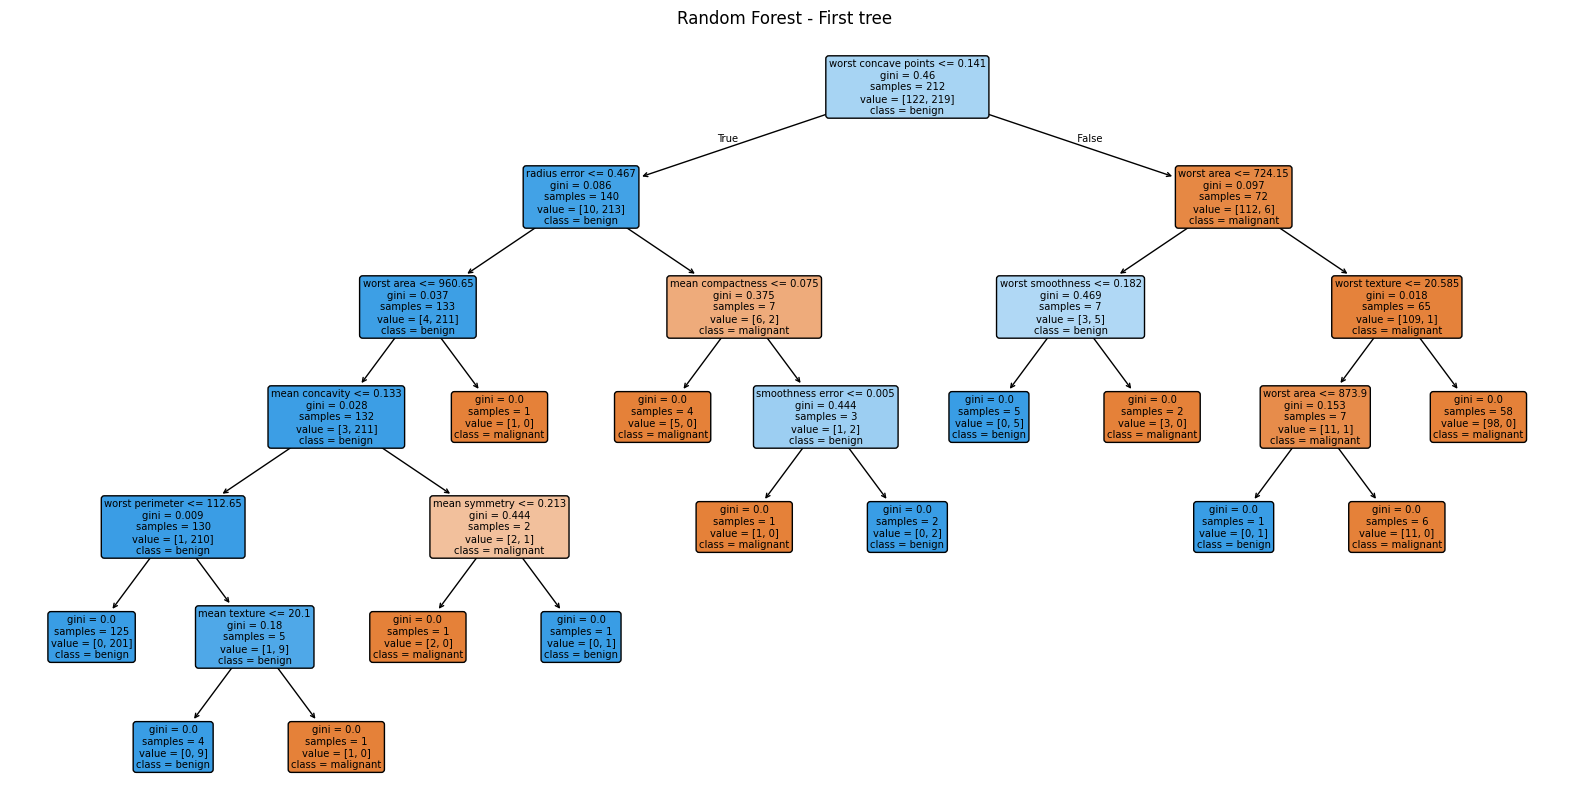

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 랜덤 포레스트에서 첫 번째 트리 추출
tree = rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=cancer.feature_names,   # 데이터의 특성 이름
    class_names=cancer.target_names,      # 클래스 이름
    filled=True,                          # 노드 색상 채우기
    rounded=True                          # 노드 모서리 둥글게
)
plt.title("Random Forest - First tree")
plt.show()

#### AdaBoost (Boosting 기반)
- AdaBoost는 여러 개의 base estimator를 순차적으로 학습시키고,

  각 분류기가 잘못 예측한 샘플에 더 많은 가중치를 주어 다음 분류기가 더 집중하도록 설계된 앙상블 기법

In [29]:
ada = AdaBoostClassifier(
    estimator = DecisionTreeClassifier(max_depth=1), 
    # 기본 분류기(base learner)
    # :단순하지만 무작위보다 약간 더 잘 맞추는 모델(여기선 깊이 1의 결정 stump)
    
    # 앙상블을 구성하는 트리(또는 기본 분류기)의 개수,
    n_estimators = 50,    # 많을수록 예측이 안정적이지만 학습 시간이 늘어남

    # 각 단계(트리)가 전체 예측에 얼마나 영향을 미칠지 조절하는 계수 
    learning_rate = 0.5,  # (값이 작을수록 학습 속도가 느려지고 과적합 위험이 줄어듦) 
    
    random_state = 42
)
ada.fit(X_train, y_train)

ada

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, random_state=42)

#### Gradient Boosting (Boosting 기반)
- 여러 개의 결정 트리를 **순차적으로** 쌓아가며, 이전 모델이 틀린 부분(오차, 잔차)을 다음 트리가 집중적으로 학습하는 앙상블 기법.
- 각 트리는 이전까지의 예측 오차를 줄이는 방향으로 만들어짐.
- 반복적으로 오차를 보정해가며, **정확하고 강력한 최종 모델**을 만든다.

> 이전까지 못 맞춘 부분을 다음 트리가 계속 보완해서 전체 예측력을 높이는 방식

In [26]:
# Gradient Boosting (잔차 학습 기반)
gb = GradientBoostingClassifier(
    n_estimators = 100,        # 트리 개수
    learning_rate = 0.1,       # 학습률(오차 보정 강도)
    max_depth = 3,             # 개별 트리 최대 깊이
    random_state = 42
)
gb.fit(X_train, y_train)

gb

GradientBoostingClassifier(random_state=42)

#### XGBoost (Boosting 기반)
- Gradient Boosting 알고리즘을 빠르고 효율적으로 구현한 오픈소스 앙상블 머신러닝 라이브러리
- 여러 개의 결정 트리를 순차적으로 쌓아가며, 이전 모델이 틀린 부분을 다음 트리가 집중적으로 학습
- 속도, 성능, 과적합 방지(정규화), 대용량 데이터 처리 등에서 강점

> 여러 결정 트리를 빠르고 효과적으로 결합해 예측력을 극대화하는 강력한 앙상블 모델

In [27]:
# XGBoost (최적화 Gradient Boosting)
xgb = XGBClassifier(
    n_estimators = 100,        # 트리 개수
    learning_rate = 0.1,       # 학습률
    max_depth = 3,             # 트리 최대 깊이
    use_label_encoder = False  # 레이블 인코딩 경고 제거 (필수 아님)
)
xgb.fit(X_train, y_train)

xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
# 모델 성능 비교 테이블 출력
models = {
    'Random Forest': rf,
    'AdaBoost': ada,
    'Gradient Boost': gb,
    'XGBoost': xgb
}
# 프린트 시 길이 맞춰주는 함수 <15, <10
print(f"│ {'모델':<15}│ {'검증 정확도':<10}│")
print("├─────────────────┼─────────────┤")
for name, model in models.items():
    acc = model.score(X_val, y_val)  # 각 모델의 X_val, y_val에서 accuracy 계산
    print(f"│ {name:<15} │ {acc:.3f}       │")


│ 모델             │ 검증 정확도    │
├─────────────────┼─────────────┤
│ Random Forest   │ 0.947       │
│ AdaBoost        │ 0.947       │
│ Gradient Boost  │ 0.965       │
│ XGBoost         │ 0.974       │


#### **[ 앙상블 분류 모델 성능 비교 ]**

- **Gradient Boosting**과 **XGBoost**가 가장 높은 정확도(97.4%)
- **Random Forest**와 **AdaBoost**도 94.7%로 매우 우수한 성능.
- 모든 모델이 94% 이상의 높은 정확도를 보임으로 **앙상블 기법**이 암 진단과 같은 이진 분류 문제에서 매우 효과적임을 알 수 있음.

# **2. Evaluation**

## 모델 평가(Evaluation)의 필요성

- 모델이 얼마나 잘 예측하는지 판단하는 기준이 필요함.
- 단순 정확도(Accuracy)만으로는 클래스 불균형, 오분류 비용 등 다양한 문제를 파악하기 어려움

### 주요 분류 모델 평가 지표

| 지표                     | 의미                                                         |
|--------------------------|-------------------------------------------------------------|
| 정확도(Accuracy)         | 전체 예측 중 정답 비율                                       |
| 오분류율(Misclassification rate) | 전체 예측 중 틀린 비율                               |
| 정밀도(Precision)        | Positive로 예측한 것 중 실제 Positive 비율 (FP에 민감)        |
| 재현율(Recall, Sensitivity) | 실제 Positive 중 올바르게 예측한 비율 (FN에 민감)      |
| F1-score                 | 정밀도와 재현율의 조화평균 (불균형 데이터에서 유용)           |
| 혼동행렬(Confusion Matrix) | 예측/실제 클래스별로 맞고 틀린 개수 표로 정리              |
| ROC Curve & AUC          | 임계값 변화에 따른 민감도/특이도 시각화, 전체 분류 성능 요약   |



In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 예측 결과
y_pred = xgb.predict(X_test)

# 정확도(Accuracy)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 오분류율(Misclassification rate) 
print("Misclassification rate:", 1 - accuracy_score(y_test, y_pred))

# 정밀도(Precision)
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

# 재현율(Recall)
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# F1-score
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.956140350877193
Misclassification rate: 0.04385964912280704
Precision: 0.9560729421281235
Recall: 0.956140350877193
F1-score: 0.9560273762928302


#### Confusion Matrix
- 단순 정확도만으로는 모델의 예측 오류 유형을 알 수 없음.
- Confusion Matrix는 **각 클래스별로 맞고 틀린 개수**를 한눈에 보여준다.
- 이를 통해 **정밀도, 재현율, F1-score** 등 다양한 성능 지표를 계산 가능.
- 어떤 클래스에서 오분류가 많은지, 모델의 약점과 개선 방향을 구체적으로 파악 가능.

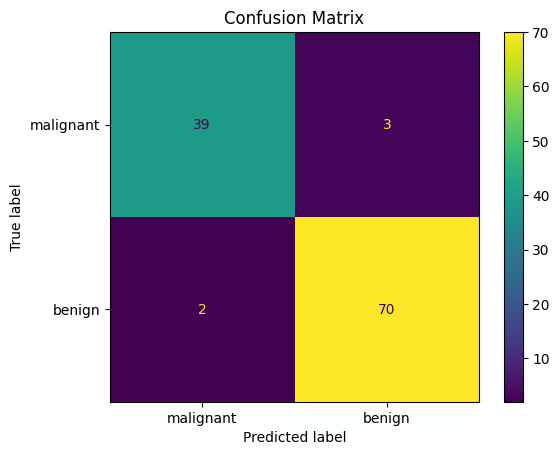

In [46]:
# Confusion Matrix 시각화
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, 
                                      display_labels=cancer.target_names)
plt.title('Confusion Matrix')
plt.show()

#### **[ xgb 모델 평가 해석 ]**

- **정확도(Accuracy): 0.956**
    - 전체 테스트 샘플 중 95.6%를 올바르게 분류
- **오분류율(Misclassification rate): 0.044**
    - 4.4%의 샘플에서 잘못된 예측이 발생
- **정밀도(Precision): 0.956**
    - 양성/음성 예측 중 실제로 맞춘 비율이 95.6%
- **재현율(Recall): 0.956**
    - 실제 양성/음성 중에서 모델이 맞춘 비율도 95.6%
- **F1-score: 0.956**
    - 정밀도와 재현율의 조화평균이 95.6%로, 두 지표가 균형 있게 높음

In [39]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 최종 모델 선택 및 테스트 세트 평가
final_model = xgb  # 검증을 통해 선정된 최적 모델(XGBoost)
y_pred = final_model.predict(X_test)  # 테스트 데이터에 대한 예측 수행

# 분류 성능 종합 평가 리포트 생성
print("\n[최종 분류 보고서]")
print(classification_report(
    y_test, 
    y_pred,
    target_names = cancer.target_names )) # 클래스 이름 매핑 


[최종 분류 보고서]
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### **[ xgb의 Classification_report 해석]**

- **정확도(accuracy): 0.96** : 전체 테스트 샘플 114개 중 96%를 올바르게 분류
 
- **support**: 각 클래스(악성, 양성)별 실제 샘플 개수 (malignant(악성): 42개, benign(양성): 72개)

- **malignant(악성)**
    - 정밀도 0.95: 악성으로 예측한 것 중 95%가 실제 악성
    - 재현율 0.93: 실제 악성 중 93%를 모델이 맞춤

- **benign(양성)**
    - 정밀도 0.96: 양성으로 예측한 것 중 96%가 실제 양성
    - 재현율 0.97: 실제 양성 중 97%를 모델이 맞춤

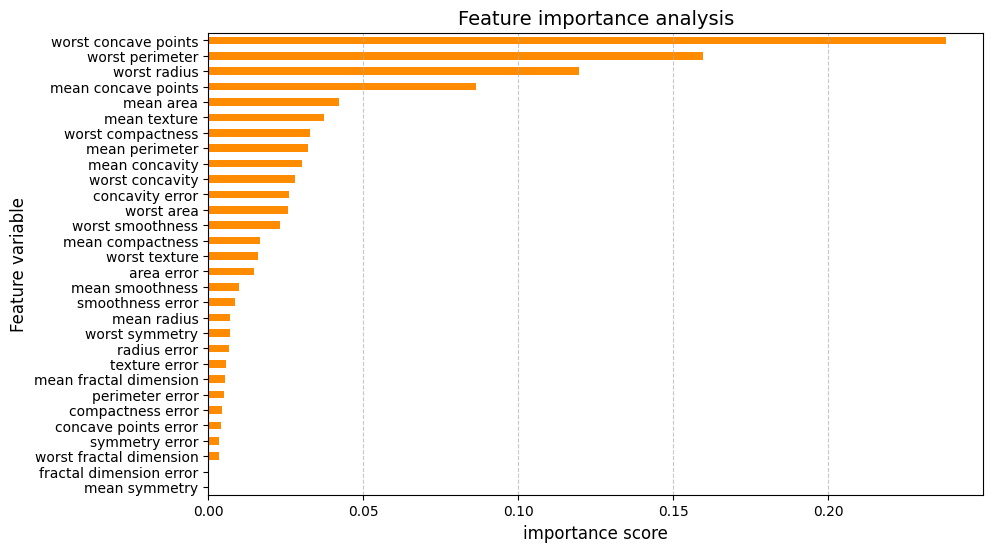

In [40]:
# 특징 중요도 분석 및 시각화
plt.figure(figsize = (10,6))
(pd.Series(final_model.feature_importances_,  # 특징별 중요도 점수
          index = cancer.feature_names).sort_values()  # 특징 이름 매핑 후 값 기준 정렬
 .plot(kind = 'barh', color = 'darkorange'))     # 수평 바 차트로 표현

# 시각화 세부 설정
plt.title('Feature importance analysis', fontsize = 14)
plt.xlabel('importance score', fontsize = 12)  # XGBoost 기본 중요도 계산 방식(gain)으로 계산, 값이 클수록 더 중요한 변수
plt.ylabel('Feature variable', fontsize = 12)  # 변수 이름
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)  # 보조 격자선 추가
plt.show()

# 해석
# 막대 길이가 길수록 해당 특성이 암 진단에 더 큰 영향을 미쳤음을 의미
# 각 특성(feature)이 모델의 예측에 얼마나 중요한 역할을 했는지 보여쥼

# HOMEWORK

## 데이터 전처리하기 (필수)

- iris 데이터를 불러와 DataFrame으로 변환
- 결측치 일부 생성 후, 평균/중앙값 등으로 적절히 대체
- 데이터의 기본 구조와 특성(컬럼명, 샘플 수, 결측치 유무 등) 확인

k-NN​

- (1) 최적 k 값 탐색 (교차 검증) ​

- (2) 시각화를 통해 최적 k 값 확인​
- (3) 스케일링 후 검증/테스트 정확도 확인 및 해석​

Decision Tree​

- (1) 모델 학습 후 시각화​

- (2) 학습 결과 해석​

Ensemble Learning​

- (1) 모델 최소 3개 활용해 학습​
- (2) 성능 비교 테이블 출력 후 사용한 앙상블 모델 성능 비교하기 규칙​
- (3) 학습 성능이 가장 높은 모델을 골라 classification_report 프린트 후 해석​
- (4) 특징 중요도 시각화하고 결과 해석